In [1]:
# data loading 
from scripts.benchmark_data_scripts.data_preprocessing import load_data, preprocess_data, split_data
path = "../../data/benchmark_data"
training_data, ground_truth = load_data(path=path)
training_data.head()
ground_truth.head()


,TreatmentLessonConstructId,QuestionConstructId,Year,ControlLessonConstructIds,ControlUsersCount,TreatmentUsersCount,ate_p_1__,ate_k_1__
0,206,211,7,{3119},73,94,0.033656,-0.019091
1,206,212,7,{3119},77,101,-0.022222,-0.036004
2,206,216,7,{3119},75,94,-0.109501,-0.118014
3,206,217,7,{3119},76,95,0.097861,0.107895
4,206,218,7,{3119},74,94,-0.029598,-0.010351


In [2]:
# data preprocessing
meta_learner_data = preprocess_data(training_data, ground_truth)
meta_learner_data.head()

C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\scripts\benchmark_data_scripts\data_preprocessing.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_group["Treatment"] = 1
C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\scripts\benchmark_data_scripts\data_preprocessing.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group["Treatment"] = 0


,Treatment,IsCorrect,AnswerValue,CorrectAnswer,QuestionSequence,ConstructId,TrueCATE_p,TrueCATE_k
682,1,0.0,1.0,4.0,2,3133,-0.107143,-0.083333
683,1,0.0,4.0,2.0,2,3133,-0.107143,-0.083333
684,1,1.0,4.0,4.0,4,3133,-0.107143,-0.083333
685,1,1.0,4.0,4.0,1,3133,-0.107143,-0.083333
686,1,1.0,3.0,3.0,2,3133,-0.107143,-0.083333


In [3]:
# train test split
X_train_p, X_test_p, y_train_p, y_test_p, X_train_k, X_test_k, y_train_k, y_test_k = split_data(meta_learner_data)
X_train_p.head()

,Treatment,IsCorrect,AnswerValue,CorrectAnswer,QuestionSequence,ConstructId,TrueCATE_p,TrueCATE_k
28370,1,1.0,1.0,1.0,4,3132,0.200,0.314286
28354,1,1.0,2.0,2.0,5,3132,0.200,0.314286
1961,0,0.0,4.0,3.0,5,3119,0.125,0.055556
1734,0,1.0,3.0,3.0,5,3119,0.125,0.055556
27826,1,1.0,1.0,1.0,4,3132,0.200,0.314286


In [4]:
#true cate values 
true_cate_train_p = X_train_p['TrueCATE_p']
true_cate_train_k = X_train_k['TrueCATE_k']
true_cate_test_p = X_test_p['TrueCATE_p']
true_cate_test_k = X_test_k['TrueCATE_k']

# drop true cate values from the data
X_train_p = X_train_p.drop(columns=['TrueCATE_p'])
X_test_p = X_test_p.drop(columns=['TrueCATE_p'])
X_train_k = X_train_k.drop(columns=['TrueCATE_k'])
X_test_k = X_test_k.drop(columns=['TrueCATE_k'])

# save the true cate test values for evaluation
true_cate_test_p.to_csv('../../results/benchmark_data_results/test_data/true_cate_test_p.csv')
true_cate_test_k.to_csv('../../results/benchmark_data_results/test_data/true_cate_test_k.csv')


In [5]:
# S-Learner
from models.Meta_learners_benchmark_data.s_learner import s_learner
import pandas as pd

# Evaluate S-Learner for Hypothesis 1 (ate_p_1__)
s_learner_cate_p = s_learner(X_train_p, X_test_p, y_train_p)
# Evaluate S-Learner for Hypothesis 2 (ate_k_1__)
s_learner_cate_k= s_learner(X_train_k, X_test_k, y_train_k)

# convert the cate estimates to dataframe
s_learner_cate_p = pd.DataFrame(s_learner_cate_p, columns=['s_cate_p'])
s_learner_cate_k = pd.DataFrame(s_learner_cate_k, columns=['s_cate_k'])

# save the cate estimates to csv file 
s_learner_cate_p.to_csv('../../results/benchmark_data_results/test_data/s_learner_cate_p.csv')
s_learner_cate_k.to_csv('../../results/benchmark_data_results/test_data/s_learner_cate_k.csv')


In [6]:
# T-Learner
from models.Meta_learners_benchmark_data.t_learner import t_learner

# Evaluate T-Learner for Hypothesis 1 (ate_p_1__)
t_learner_cate_p= t_learner(X_train_p, X_test_p, y_train_p)

# Evaluate T-Learner for Hypothesis 2 (ate_k_1__)
t_learner_cate_k = t_learner(X_train_k, X_test_k, y_train_k)

# convert the cate estimates to dataframe
t_learner_cate_p = pd.DataFrame(t_learner_cate_p, columns=['t_cate_p'])
t_learner_cate_k = pd.DataFrame(t_learner_cate_k, columns=['t_cate_k'])

# save the cate estimates to csv file
t_learner_cate_p.to_csv('../../results/benchmark_data_results/test_data/t_learner_cate_p.csv')
t_learner_cate_k.to_csv('../../results/benchmark_data_results/test_data/t_learner_cate_k.csv')

In [7]:
# X-Learner
from models.Meta_learners_benchmark_data.x_learner import x_learner

# Evaluate X-Learner for Hypothesis 1 (ate_p_1__)
x_learner_cate_p = x_learner(X_train_p, X_test_p, y_train_p)

# Evaluate X-Learner for Hypothesis 2 (ate_k_1__)
x_learner_cate_k = x_learner(X_train_k, X_test_k, y_train_k)

# convert the cate estimates to dataframe
x_learner_cate_p = pd.DataFrame(x_learner_cate_p, columns=['x_cate_p'])
x_learner_cate_k = pd.DataFrame(x_learner_cate_k, columns=['x_cate_k'])

# save the cate estimates to csv file
x_learner_cate_p.to_csv('../../results/benchmark_data_results/test_data/x_learner_cate_p.csv')
x_learner_cate_k.to_csv('../../results/benchmark_data_results/test_data/x_learner_cate_k.csv')

c:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

In [8]:
# R-Learner
from models.Meta_learners_benchmark_data.r_learner import r_learner

# Evaluate R-Learner for Hypothesis 1 (ate_p_1__)
r_learner_cate_p= r_learner(X_train_p, X_test_p, y_train_p, 'p')

# Evaluate R-Learner for Hypothesis 2 (ate_k_1__)
r_learner_cate_k = r_learner(X_train_k, X_test_k, y_train_k, 'k')

# convert the cate estimates to dataframe
r_learner_cate_p = pd.DataFrame(r_learner_cate_p, columns=['r_cate_p'])
r_learner_cate_k = pd.DataFrame(r_learner_cate_k, columns=['r_cate_k'])

# save the cate estimates to csv file
r_learner_cate_p.to_csv('../../results/benchmark_data_results/test_data/r_learner_cate_p.csv')
r_learner_cate_k.to_csv('../../results/benchmark_data_results/test_data/r_learner_cate_k.csv')

C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\models\Meta_learners_benchmark_data\r_learner.py:51: RuntimeWarning: divide by zero encountered in divide
  residual_target = y_residual_scaled / t_residual_scaled
C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\models\Meta_learners_benchmark_data\r_learner.py:51: RuntimeWarning: divide by zero encountered in divide
  residual_target = y_residual_scaled / t_residual_scaled
C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\models\Meta_learners_benchmark_data\r_learner.py:51: RuntimeWarning: invalid value encountered in divide
  residual_target = y_residual_scaled / t_residual_scaled


In [9]:
from scripts.benchmark_data_scripts.train_models import compute_rmse, compute_bias, compute_variance
# Extract true outcomes for RMSE calculation
true_outcomes = y_test_p

# Get CATE estimates for all meta-learners for hypothesis p
learners_p = {
    "S-Learner": s_learner(X_train_p, X_test_p, y_train_p),
    "T-Learner": t_learner(X_train_p, X_test_p, y_train_p),
    "X-Learner": x_learner(X_train_p, X_test_p, y_train_p),
    "R-Learner": r_learner(X_train_p, X_test_p, y_train_p, "p")
}

# Get CATE estimates for all meta-learners for hypothesis k
learners_k = {
    "S-Learner": s_learner(X_train_k, X_test_k, y_train_k),
    "T-Learner": t_learner(X_train_k, X_test_k, y_train_k),
    "X-Learner": x_learner(X_train_k, X_test_k, y_train_k),
    "R-Learner": r_learner(X_train_k, X_test_k, y_train_k, "k")
}

# Initialize results storage
result_df = []

# Evaluate metrics for hypothesis p
for learner_name, cate_predictions in learners_p.items():
    rmse = compute_rmse(y_test_p, cate_predictions)
    bias = compute_bias(y_test_p, cate_predictions)
    variance = compute_variance(cate_predictions)
    result_df.append({
        "Learner": learner_name,
        "Hypothesis": "p",
        "RMSE": rmse,
        "Bias": bias,
        "Variance": variance
    })

# Evaluate metrics for hypothesis k
for learner_name, cate_predictions in learners_k.items():
    rmse = compute_rmse(y_test_k, cate_predictions)
    bias = compute_bias(y_test_k, cate_predictions)
    variance = compute_variance(cate_predictions)
    result_df.append({
        "Learner": learner_name,
        "Hypothesis": "k",
        "RMSE": rmse,
        "Bias": bias,
        "Variance": variance
    })

# Convert results to DataFrame for better visualization
result_df = pd.DataFrame(result_df)

# Print the results
print(result_df)



c:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\models\Meta_learners_benchmark_data\r_learner.py:51: RuntimeWarning: divide by zero encountered in divide
  residual_target = y_residual_scaled / t_residual_scaled


     Learner Hypothesis      RMSE      Bias  Variance
0  S-Learner          p  0.305969 -0.209539  0.000018
1  T-Learner          p  0.550976 -0.400933  0.034558
2  X-Learner          p  0.490124 -0.387946  0.012805
3  R-Learner          p  0.272407 -0.004249  0.022610
4  S-Learner          k  0.344439 -0.261056  0.000139
5  T-Learner          k  0.388993 -0.160182  0.041548
6  X-Learner          k  0.288014 -0.185189  0.025276
7  R-Learner          k  1.624940  0.968914  1.620764


c:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\models\Meta_learners_benchmark_data\r_learner.py:51: RuntimeWarning: divide by zero encountered in divide
  residual_target = y_residual_scaled / t_residual_scaled
C:\Users\dell\OneDrive\Desktop\Thesis\CATE_Estimation_using_Meta_Learners\models\Meta_learners_benchmark_data\r_learner.py:51: RuntimeWarning: invalid value encountered in divide
  residual_targ

In [10]:
# cpmparing true and predicted cate accuracy
from sklearn.metrics import mean_squared_error

# Create a dictionary to store the results
mse_true_vs_pred = {
    "Learner": ["S-Learner", "T-Learner", "X-Learner", "R-Learner"],
    "MSE_True_vs_Pred_Hypothesis_p": [
        mean_squared_error(true_cate_test_p, s_learner_cate_p),  # S-Learner MSE for Hypothesis 1 (ate_p_1__)
        mean_squared_error(true_cate_test_p, t_learner_cate_p),  # T-Learner MSE for Hypothesis 1 (ate_p_1__)
        mean_squared_error(true_cate_test_p, x_learner_cate_p),  # X-Learner MSE for Hypothesis 1 (ate_p_1__)
        mean_squared_error(true_cate_test_p, r_learner_cate_p),  # R-Learner MSE for Hypothesis 1 (ate_p_1__)
    ],
    "MSE_True_vs_Pred_Hypothesis_k": [
        mean_squared_error(true_cate_test_k, s_learner_cate_k),  # S-Learner MSE for Hypothesis 2 (ate_k_1__)
        mean_squared_error(true_cate_test_k, t_learner_cate_k),  # T-Learner MSE for Hypothesis 2 (ate_k_1__)
        mean_squared_error(true_cate_test_k, x_learner_cate_k),  # X-Learner MSE for Hypothesis 2 (ate_k_1__)
        mean_squared_error(true_cate_test_k, r_learner_cate_k),  # R-Learner MSE for Hypothesis 2 (ate_k_1__)
    ]
}

# Convert results to DataFrame for better visualization
mse_true_vs_pred_df = pd.DataFrame(mse_true_vs_pred)

# Print the results
print(mse_true_vs_pred_df)

     Learner  MSE_True_vs_Pred_Hypothesis_p  MSE_True_vs_Pred_Hypothesis_k
0  S-Learner                       0.093617                       0.118638
1  T-Learner                       0.303575                       0.151316
2  X-Learner                       0.240222                       0.082952
3  R-Learner                       0.074206                       2.640431


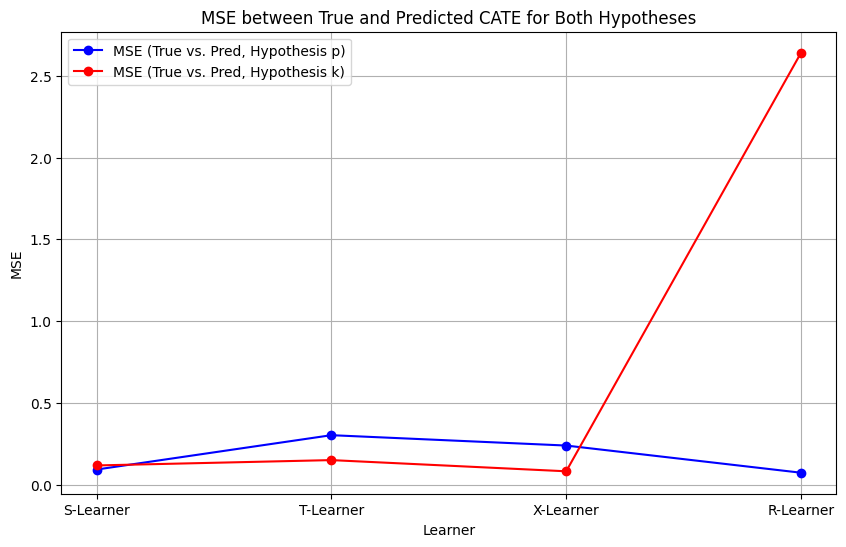

In [11]:
# import the required libraries
import matplotlib.pyplot as plt

# plot the mse between true and predicted cate for both hypotheses
plt.figure(figsize=(10, 6))

# Plot MSE between true and predicted CATE for Hypothesis 1
plt.plot(mse_true_vs_pred_df["Learner"], mse_true_vs_pred_df["MSE_True_vs_Pred_Hypothesis_p"], marker='o', color='b', label="MSE (True vs. Pred, Hypothesis p)")

# Plot MSE between true and predicted CATE for Hypothesis 2
plt.plot(mse_true_vs_pred_df["Learner"], mse_true_vs_pred_df["MSE_True_vs_Pred_Hypothesis_k"], marker='o', color='r', label="MSE (True vs. Pred, Hypothesis k)")

# Add titles and labels
plt.title("MSE between True and Predicted CATE for Both Hypotheses")
plt.ylabel("MSE")
plt.xlabel("Learner")

# Add grid for better readability
plt.grid(True)

# Add legend to differentiate between Hypothesis 1 and Hypothesis 2
plt.legend()

# Display the plot
plt.show()

In [12]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error

def evaluate_cate_accuracy_with_bootstrapping(true_cate, predicted_cate, n_bootstraps=10, random_state=42):
    """
    Evaluate CATE accuracy using bootstrapping for variability assessment.

    Parameters:
    - true_cate: np.ndarray, ground truth CATE values.
    - predicted_cate: np.ndarray, predicted CATE values from the meta-learner.
    - n_bootstraps: int, number of bootstrap resamples.
    - random_state: int, seed for reproducibility.

    Returns:
    - dict containing mean MSE and standard deviation of MSE for each meta-learner.
    """
    mse_bootstrap = []

    for _ in range(n_bootstraps):
        # Resample true and predicted CATE values
        true_cate_boot, predicted_cate_boot = resample(
            true_cate, predicted_cate, random_state=random_state
        )

        # Calculate MSE for this bootstrap sample
        mse = mean_squared_error(true_cate_boot, predicted_cate_boot)
        mse_bootstrap.append(mse)

    return {
        "mean_mse": np.mean(mse_bootstrap),
        "std_mse": np.std(mse_bootstrap),
        "mse_values": mse_bootstrap,
    }

# Bootstrap evaluation for Hypothesis p
results_p = {
    "Learner": ["S-Learner", "T-Learner", "X-Learner", "R-Learner"],
    "Mean_MSE_Hypothesis_p": [],
    "STD_MSE_Hypothesis_p": [],
}

for learner, predicted_cate in zip(
    ["S-Learner", "T-Learner", "X-Learner", "R-Learner"],
    [s_learner_cate_p, t_learner_cate_p, x_learner_cate_p, r_learner_cate_p],
):
    bootstrap_result = evaluate_cate_accuracy_with_bootstrapping(
        true_cate_test_p, predicted_cate, n_bootstraps=10, random_state=42
    )
    results_p["Mean_MSE_Hypothesis_p"].append(bootstrap_result["mean_mse"])
    results_p["STD_MSE_Hypothesis_p"].append(bootstrap_result["std_mse"])

# Bootstrap evaluation for Hypothesis k
results_k = {
    "Learner": ["S-Learner", "T-Learner", "X-Learner", "R-Learner"],
    "Mean_MSE_Hypothesis_k": [],
    "STD_MSE_Hypothesis_k": [],
}

for learner, predicted_cate in zip(
    ["S-Learner", "T-Learner", "X-Learner", "R-Learner"],
    [s_learner_cate_k, t_learner_cate_k, x_learner_cate_k, r_learner_cate_k],
):
    bootstrap_result = evaluate_cate_accuracy_with_bootstrapping(
        true_cate_test_k, predicted_cate, n_bootstraps=10, random_state=42
    )
    results_k["Mean_MSE_Hypothesis_k"].append(bootstrap_result["mean_mse"])
    results_k["STD_MSE_Hypothesis_k"].append(bootstrap_result["std_mse"])

# Combine results into a DataFrame
results_combined = pd.DataFrame(results_p).merge(
    pd.DataFrame(results_k), on="Learner"
)

# Display the results
print(results_combined)


     Learner  Mean_MSE_Hypothesis_p  STD_MSE_Hypothesis_p  \
0  S-Learner               0.095943                   0.0   
1  T-Learner               0.309189                   0.0   
2  X-Learner               0.243333                   0.0   
3  R-Learner               0.074192                   0.0   

   Mean_MSE_Hypothesis_k  STD_MSE_Hypothesis_k  
0               0.120917          0.000000e+00  
1               0.157925          2.775558e-17  
2               0.082841          0.000000e+00  
3               2.538254          4.440892e-16  


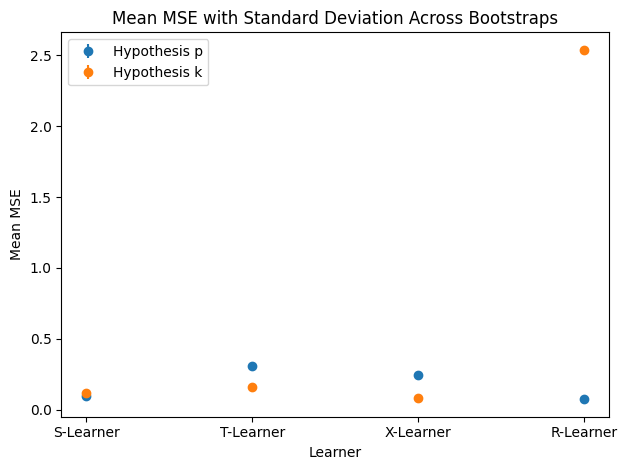

In [13]:
import matplotlib.pyplot as plt

# Plot Mean and Std for Hypothesis p
plt.errorbar(
    results_combined["Learner"],
    results_combined["Mean_MSE_Hypothesis_p"],
    yerr=results_combined["STD_MSE_Hypothesis_p"],
    fmt="o",
    label="Hypothesis p",
)
# Plot Mean and Std for Hypothesis k
plt.errorbar(
    results_combined["Learner"],
    results_combined["Mean_MSE_Hypothesis_k"],
    yerr=results_combined["STD_MSE_Hypothesis_k"],
    fmt="o",
    label="Hypothesis k",
)

plt.title("Mean MSE with Standard Deviation Across Bootstraps")
plt.xlabel("Learner")
plt.ylabel("Mean MSE")
plt.legend()
plt.tight_layout()
plt.show()
